## Masterskaya_24DS+_(STD)_Мэтчинг

  - Ф.И.О. - Бакиев Рушан Рашитович
  - Телеграмм - https://t.me/Rushanchik86

**Цель проекта:**

- разработать алгоритм, который для всех товаров из validation.csv предложит несколько вариантов наиболее похожих товаров из base;
- оценить качество алгоритма по метрике accuracy@5.


Импортируем необходимые библиотеки и модули:

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import faiss
import time

C:\Users\Rushan\AppData\Local\Temp\ipykernel_7064\2020055516.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Загрузим данные в датафреймы и выведем первые 5 строк, чтобы познакомиться с данными:

In [2]:
base = pd.read_csv('/Python_work/data/base.csv')
train = pd.read_csv('/Python_work/data/train.csv')
validation = pd.read_csv('/Python_work/data/validation.csv')
validation_answer = pd.read_csv('/Python_work/data/validation_answer.csv')

In [3]:
pd.options.display.max_columns = 200
display(base.head())
display(train.head())
display(validation.head())
validation_answer.head()

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0-base,-115.083890,11.152912,-64.426760,-118.88089,216.482440,-104.698060,-469.070588,44.348083,120.915344,181.449700,-124.06151,-32.458237,-57.420560,36.207405,182.71677,-28.071688,-5.209374,-1.732182,-91.09186,-79.46667,-103.939090,1507.231274,-32.591667,51.414360,-51.905360,813.770071,-41.556538,8.419807,-129.976640,148.76503,-10.069234,-143.00504,79.848694,-537.183707,2.773180,111.518680,4.257666,-153.34058,-123.62608,-39.707664,-12.768708,-4.170106,-152.967130,75.911520,-57.470088,17.266476,-98.871155,-138.06754,91.000380,-170.702000,-50.020390,59.794296,78.106380,-89.375725,89.412100,79.812180,-129.51361,-44.659496,-80.44221,5.149714,-64.518950,-138.77763,-42.808693,38.800827,-151.76218,-74.389090,63.66634,-4.703861,92.933610,115.269190,-112.756640,-60.830353
1,1-base,-34.562202,13.332763,-69.787610,-166.53348,57.680607,-86.098370,-85.076666,-35.637436,119.718636,195.234190,-141.30435,-126.768900,-68.853530,8.314717,143.08174,8.778257,15.157185,48.246360,-244.95486,-80.27942,-81.788040,429.880035,-5.937690,70.142654,66.576840,813.770071,3.214371,17.164303,-39.418385,148.15588,-7.579590,-174.36995,101.224630,-303.939233,16.914630,53.394676,33.451824,-148.55263,-110.34017,-33.277206,-8.688703,13.650302,-91.228745,38.445015,-31.948470,62.484820,-166.473360,-189.01042,-56.731556,-30.027319,59.171060,-56.711540,63.542606,-121.319170,97.426056,74.832840,-138.77705,58.887608,-71.59534,-251.952358,11.392853,-148.57166,-117.767525,41.100000,-157.82940,-94.446806,68.20211,24.346846,179.937930,116.834000,-84.888941,-59.524610
2,2-base,-54.233746,6.379371,-29.210136,-133.41383,150.895830,-99.435326,52.554795,62.381706,128.951450,164.381470,-140.82245,-22.486748,-51.666990,2.521726,140.58545,-22.039230,-7.128634,-5.184787,-111.71212,-79.02927,-82.452576,1507.231274,-0.421011,84.108010,63.344510,813.770071,-105.211050,18.844700,-94.789474,151.38771,-21.483440,-144.84537,48.502934,-780.449185,64.767310,79.781555,-13.390142,-150.06166,-118.75855,-40.896286,-15.222620,-1.860338,-93.820656,98.749070,-46.745782,65.927475,-10.286392,-125.32137,21.048609,-22.637775,68.915985,-54.902260,66.335470,-142.927920,83.030980,69.979630,-123.73389,65.320880,-114.03718,-529.396956,-101.581375,-134.65822,-76.397800,46.011803,-207.14442,127.325570,65.56618,66.325680,81.073490,116.594154,-1074.464888,-32.527206
3,3-base,-87.520130,4.037884,-87.803030,-185.06763,76.369540,-58.985165,-383.182845,-33.611237,122.031910,136.233580,-108.47044,-104.537780,-82.388490,-79.986740,113.59631,-38.995880,-4.787360,8.327808,-124.85576,-79.10902,-107.943275,1479.170530,-125.271614,24.656485,-16.921055,813.770071,-182.680270,14.715704,-62.932700,151.20198,10.613454,-134.93434,58.777730,-529.295053,43.665924,92.806305,-38.936657,-145.04530,-124.29577,-36.876730,-17.742870,10.536242,-124.584150,121.914150,-17.321358,105.217240,-94.379650,-63.76927,29.217487,-26.423973,5.869829,64.061550,63.513280,-112.258100,80.926590,72.636100,-137.31432,7.912551,-62.18892,-540.321044,-89.588715,-149.32669,-70.647940,-6.358921,-147.20105,-37.692750,66.20289,-20.566910,137.206940,117.474100,-1074.464888,-72.915490
4,4-base,-72.743850,6.522049,43.671265,-140.60803,5.820023,-112.074080,-397.711282,45.182500,122.167180,112.119064,-110.34245,-38.982060,-50.228867,-26.690920,135.27290,-7.510103,8.924209,111.576950,-130.83319,-79.31585,-57.843952,1262.919738,19.225910,59.811813,76.159670,312.698903,-76.726974,21.299923,-24.069107,167.38553,-44.059470,-148.13185,98.042610,-657.524388,96.363170,71.061520,-36.563557,-135.37244,-123.70898,-44.739437,-10.855220,8.354800,-168.328860,215.928070,-32.975979,66.864880,30.838630,-211.54037,57.695343,-67.822630,-29.389133,-34.123740,54.710550,-26.032013,90.673910,58.086998,-134.78206,77.620390,-176.61588,-529.762412,-100.565520,-125.31733,-57.199104,

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,Target
0,0-query,-53.882748,17.971436,-42.117104,-183.93668,187.517490,-87.144930,-347.360606,38.307602,109.085560,30.413513,-88.08269,-52.695540,-27.692442,4.872923,198.348000,-30.075249,-3.803569,-135.810610,-161.84137,-78.512180,-94.42894,898.436927,-70.140520,78.420360,108.032776,813.770071,-74.790880,12.610422,-183.821840,149.71584,-27.042316,-133.21217,106.420746,-303.939233,48.73079,58.185707,24.250950,-151.22410,-104.282265,-34.492810,-12.587054,2.622891,-120.969920,149.99164,-31.948470,82.314430,-115.830470,-243.30939,6.622036,-132.197660,68.71256,-38.806824,62.937435,-132.65445,89.189026,87.039780,-121.27988,-6.986934,-206.513820,29.485587,-77.029590,-132.38617,-105.427820,70.107360,-155.80257,-101.965943,65.903790,34.457500,62.642094,134.763600,-415.750254,-25.958572,675816-base
1,1-query,-87.776370,6.806268,-32.054546,-177.26039,120.803330,-83.810590,-94.572749,-78.433090,124.915900,140.331070,-177.60580,-84.995514,42.810810,-57.256332,96.792534,-19.261467,0.739535,50.619213,-155.26703,-78.659430,-92.76149,353.157741,-34.744545,82.487110,-28.450592,813.770071,-137.529630,26.595627,-136.783450,153.35791,48.810093,-115.92215,87.464220,-222.286354,25.12415,91.887140,-30.636870,-136.59314,-140.500120,-43.449757,-7.226884,8.265747,-117.915470,149.15090,-18.751057,95.315384,-60.093273,-83.82058,37.449867,-23.298859,74.06108,-7.139753,75.862400,-112.04511,82.857730,54.067215,-134.00539,-26.142574,-214.632110,-457.848461,21.459618,-137.41136,-40.812233,4.669178,-151.69771,-1.638704,68.170876,25.096191,89.974976,130.589630,-1035.092211,-51.276833,366656-base
2,2-query,-49.979565,3.841486,-116.118590,-180.40198,190.128430,-50.837620,26.943937,-30.447489,125.771164,211.607820,-86.34656,-35.666546,16.395317,-80.802850,137.908650,-23.532760,-47.256584,-16.650242,-194.50568,-78.372925,-69.32448,1507.231274,-52.500970,-34.165775,52.958652,813.770071,-18.021725,20.951107,-50.321780,158.76062,0.178065,-183.06967,99.053570,-1018.469545,-51.80112,97.766770,-10.865850,-144.42316,-133.819490,-78.902300,-17.200352,4.467452,-63.970737,154.63953,-30.211614,48.527400,-122.406640,-112.71362,53.461838,-31.117260,107.84151,16.482935,77.934480,-95.61873,91.460075,63.119510,-126.93925,8.066627,-195.677670,-163.120000,-72.830000,-139.22307,-52.031662,78.039764,-169.14620,82.144186,66.008220,18.400496,212.409730,121.931470,-1074.464888,-22.547178,1447819-base
3,3-query,-47.810562,9.086598,-115.401695,-121.01136,94.652840,-109.255410,-775.150134,79.186520,124.003100,242.650650,-146.51707,-159.469850,-13.844755,-6.113928,118.939255,-44.585907,9.559358,14.435648,-156.90683,-78.789320,-78.73709,1507.231274,19.957405,34.834290,-8.820732,813.770071,-125.606800,17.584084,-58.452904,141.28180,-54.959310,-136.98854,63.880493,-1018.469545,89.22893,65.919960,-24.078644,-152.33410,-91.199380,-28.225390,-4.767386,0.158236,-129.128660,122.95837,-30.800995,123.623400,-37.540867,-72.13980,71.240990,-168.115590,118.23645,-18.065195,37.255720,-137.69104,87.500770,62.437290,-131.26064,35.692660,-86.038830,-379.339090,-153.465770,-131.19829,-61.567047,44.515266,-145.41675,93.990981,64.131350,106.061920,83.178760,118.277725,-1074.464888,-19.902788,1472602-base
4,4-query,-79.632126,14.442886,-58.903397,-147.05254,57.127068,-16.239529,-321.317964,45.984676,125.941284,103.392670,-107.15302,-8.800034,-50.977800,29.457338,143.389310,5.614824,-45.274760,9.643625,-77.55463,-79.066610,-77.92646,1507.231274,16.612400,116.284290,33.754898,813.770071,-105.765335,6.523008,-19.812988,157.69392,-20.604088,-146.59128,78.849570,-780.449185,87.56077,73.036660,16.891030,-144.65790,-116.122150,-19.353254,-7.709266,-5.394988,-140.252120,193.18497,-53.147078,79.869446,-151.131350,-45.05616,79.796234,46.763016,47.68181,-24.104229,75.142590,-207.34506,93.436935,51.505203,-135.47598,9

,Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,100000-query,-57.372734,3.597752,-13.213642,-125.92679,110.74594,-81.279594,-461.003172,139.815720,112.880980,75.215750,-131.89280,-140.968570,-57.987164,-22.868887,150.89552,7.965574,17.622066,-34.868217,-216.13855,-80.908730,-52.579520,263.363136,56.266876,66.924710,21.609911,813.770071,-32.782940,20.794031,-79.779076,156.30708,-42.831330,-71.723335,83.283660,-304.174382,1.609402,55.834587,-29.474255,-139.16277,-126.038350,-62.643830,-5.012346,11.984920,-43.084946,190.124000,-24.996636,76.153900,-245.26157,-143.65648,-4.259628,-46.664196,-27.085403,-34.346962,75.530106,-47.171707,92.697320,60.475630,-127.48687,-39.484753,-124.384575,-307.949760,45.506813,-144.19095,-75.51302,52.830902,-143.43945,59.051935,69.28224,61.927513,111.59253,115.140656,-1099.130485,-117.079360
1,100001-query,-53.758705,12.790300,-43.268543,-134.41762,114.44991,-90.520130,-759.626065,63.995087,127.117905,53.128998,-153.71725,-63.951330,-52.369495,-33.390945,148.61950,-22.483830,15.164185,-56.202000,-153.61438,-79.831825,-101.055480,1203.537156,81.597130,101.018654,56.783424,92.209628,-126.860340,10.382887,-38.523360,165.38391,-77.840485,-169.538680,103.483240,-915.735701,16.109938,14.669937,-38.707085,-149.53838,-138.792920,-36.076176,-2.781422,2.283144,-142.477890,189.953950,-18.408230,90.517050,-95.53100,-259.63605,52.437836,-30.004599,14.502060,-1.071201,66.842670,-161.279890,94.794174,50.419983,-125.07526,-25.169033,-176.176880,-655.836897,-99.238370,-141.53522,-79.44183,29.185436,-168.60590,-82.872443,70.76560,-65.975950,97.07716,123.391640,-744.442332,-25.009320
2,100002-query,-64.175095,-3.980927,-7.679249,-170.16093,96.44616,-62.377740,-759.626065,87.477554,131.270110,168.920320,-220.30954,-31.378445,-8.788761,2.285323,133.26611,-41.309080,14.305538,-18.231812,-205.53370,-78.160310,-96.607670,1507.231274,-5.964200,34.937443,-56.086887,813.770071,-13.200474,18.966661,-35.110190,151.36850,-17.490252,-145.884300,15.533379,-655.395514,39.412827,62.554955,9.924992,-143.93462,-123.107796,-37.032475,-13.501337,12.913328,-116.038020,176.276150,-45.909942,103.491360,-90.65699,-162.61570,117.128235,13.079479,69.826890,-6.874451,63.707214,-123.851070,91.610820,59.760067,-129.56618,-12.822194,-154.197650,-407.199067,5.522629,-126.81297,-134.79541,37.368730,-159.66231,-119.232725,67.71044,86.002060,137.63641,141.081630,-294.052271,-70.969604
3,100003-query,-99.286860,16.123936,9.837166,-148.06044,83.69708,-133.729720,58.576403,-19.046660,115.042404,75.206730,-114.27196,-71.406456,-65.349320,24.377070,50.46730,-14.721335,15.069309,-46.682995,-176.60437,-78.690700,-139.227450,325.547112,3.632292,74.929504,-4.802103,813.770071,-52.982597,15.644381,-54.087467,151.30914,21.088570,-134.507890,65.118960,-529.295053,131.565520,67.642700,-22.884491,-145.90652,-86.917330,-11.863579,-22.188885,0.463720,-212.533750,170.522580,-48.092532,99.712555,-194.69241,-141.52318,60.217050,73.386380,118.567856,58.900810,55.569030,-181.091660,83.340485,66.083240,-114.04887,-57.156870,-56.335075,-318.680065,-15.984783,-128.10133,-77.23611,44.100494,-132.53012,-106.318982,70.88396,23.577892,133.18396,143.252940,-799.363667,-89.392670
4,100004-query,-79.532920,-0.364173,-16.027431,-170.88495,165.45392,-28.291668,33.931936,34.411217,128.903980,102.086914,-76.21417,-26.393860,34.423640,50.938890,157.68318,-23.786497,-33.175415,-0.592607,-193.31854,-79.651030,-91.889786,1358.481072,44.027733,121.527210,46.183000,433.623103,-82.233200,21.068508,-32.940117,149.26895,0.404718,-97.674530,81.719990,-825.644804,9.397169,49.359340,17.725466,-160.16815,-129.367950,-55.532898,-2.597821,-0.226103,-41.369140,92.090195,-58.626857,73.655440,-10.25737,-175.65678,25.395056,47.874825,51.464676,140.951680,58.751133,-215.487640,91.255370,44.165030,-135.29533,-19.508160,-106.674866,-127.978884,-1

,Id,Expected
0,100000-query,2676668-base
1,100001-query,91606-base
2,100002-query,472256-base
3,100003-query,3168654-base
4,100004-query,75484-base


Размерность данных:

In [4]:
[base.shape, train.shape, validation.shape, validation_answer.shape]

[(2918139, 73), (100000, 74), (100000, 73), (100000, 2)]

**Описание:**

  - base.csv - анонимизированный набор товаров. Каждый товар представлен как уникальный id (0-base, 1-base, 2-base) и вектор признаков размерностью 72.

  - train.csv - обучающий датасет. Каждая строчка - один товар, для которого известен уникальный id (0-query, 1-query, …) , вектор признаков И id товара из base.csv, который максимально похож на него (по мнению экспертов).

  - validation.csv - датасет с товарами (уникальный id и вектор признаков), для которых надо найти наиболее близкие товары из base.csv

  - validation_answer.csv - правильные ответы к предыдущему файлу

### Анализ признаков:

Данные изначально подготовлены, предобработка не требуется.

Проверку корреляции признаков и пострение диаграммы распределения не представляется целесообразным, из-за слишком большого обьъема.

Необходимо проанализировать - какие признаки влияют на схожесть товаров. Размерность признаков 72, понятно что для разных групп товаров соответсвие будет по различным комбинациям признаков, а неинформативные признаки будут лишь ухудшать матрику качества и от них придётся избавится. 

В нашем распоряжении тренировочный набор, в котором известны соответсвия base. Выделим в base данные соответсвующие в train и сравним их признаки. Для каждого признака определим разность между ними по модулю, предпологаем что для схожих товаров будут минимальные расхождения в нужным признаках. Перед этим конечно же необходимо стандартизировать признаки:

In [5]:
train_analys = train
train_analys = train_analys.drop_duplicates('Target')
train_analys = train_analys.drop(['Id'], axis=1)
train_analys.rename(columns = {'Target':'Id'}, inplace = True )
base_in_train = base[base['Id'].isin(train_analys['Id'])]
base_train_joint = pd.merge(base_in_train, train_analys, on='Id', how='outer', suffixes=('_b', '_t'))
base_train_joint.head()

,Id,0_b,1_b,2_b,3_b,4_b,5_b,6_b,7_b,8_b,9_b,10_b,11_b,12_b,13_b,14_b,15_b,16_b,17_b,18_b,19_b,20_b,21_b,22_b,23_b,24_b,25_b,26_b,27_b,28_b,29_b,30_b,31_b,32_b,33_b,34_b,35_b,36_b,37_b,38_b,39_b,40_b,41_b,42_b,43_b,44_b,45_b,46_b,47_b,48_b,49_b,50_b,51_b,52_b,53_b,54_b,55_b,56_b,57_b,58_b,59_b,60_b,61_b,62_b,63_b,64_b,65_b,66_b,67_b,68_b,69_b,70_b,71_b,0_t,1_t,2_t,3_t,4_t,5_t,6_t,7_t,8_t,9_t,10_t,11_t,12_t,13_t,14_t,15_t,16_t,17_t,18_t,19_t,20_t,21_t,22_t,23_t,24_t,25_t,26_t,27_t,28_t,29_t,30_t,31_t,32_t,33_t,34_t,35_t,36_t,37_t,38_t,39_t,40_t,41_t,42_t,43_t,44_t,45_t,46_t,47_t,48_t,49_t,50_t,51_t,52_t,53_t,54_t,55_t,56_t,57_t,58_t,59_t,60_t,61_t,62_t,63_t,64_t,65_t,66_t,67_t,68_t,69_t,70_t,71_t
0,13-base,-71.780470,9.491869,-80.955360,-105.35263,84.31845,-78.632150,-429.259026,108.983040,124.514730,138.177920,-122.214066,-11.196587,-97.106610,4.058546,144.60391,-13.086493,-0.823323,13.456844,-188.140930,-79.693930,-84.54058,1507.231274,8.378965,43.542637,-9.430996,813.770071,-43.836754,16.026040,-121.422410,158.55688,4.551791,-96.02693,77.532166,-929.142044,-32.281788,84.498470,-36.741680,-135.10780,-117.458046,-80.792076,-2.642479,9.865824,-133.73564,99.23569,-23.449432,49.408710,-152.859380,-72.64242,111.789180,-75.507400,-34.741870,-48.611710,42.095108,-160.941820,95.40554,62.669197,-142.45813,-13.548282,-152.025590,-495.891886,-9.418518,-147.55693,-29.982979,40.114300,-138.047400,59.624223,68.618100,71.057980,95.904850,141.277160,-1205.302279,-51.975533,-71.780470,9.491869,-80.955360,-105.35263,84.318450,-78.63215,-759.626065,108.983040,124.514730,138.177920,-122.214066,-11.196587,-97.106610,4.058546,144.60391,-13.086493,-0.823323,13.456844,-188.140930,-79.69393,-84.540580,1507.231274,8.378965,43.542637,-9.430996,813.770071,-43.836754,16.026040,-121.422410,158.55688,4.551791,-96.02693,77.532166,-361.845826,-32.281788,84.498470,-36.741680,-135.10780,-117.458046,-80.792076,-2.642479,9.865824,-133.735640,99.23569,-23.449432,49.408710,-152.859380,-72.64242,111.789180,-75.507400,-34.741870,-48.611710,42.095108,-160.941820,95.40554,62.669197,-142.45813,-13.548282,-152.025590,-349.684852,-9.418518,-147.55693,-29.982979,40.114300,-138.04740,59.624223,68.61810,71.057980,95.904850,141.27716,-1205.302279,-51.975533
1,20-base,-91.004456,5.095716,-22.869780,-172.41708,133.93912,-35.476190,-759.626065,-0.931942,124.832550,117.254860,-123.657520,-92.454956,-35.439034,59.684670,152.78387,-18.750875,-10.191237,-57.169770,-189.775380,-79.153540,-79.03812,681.958004,28.042683,114.367190,4.895265,254.461578,-44.713370,20.150475,-40.531548,151.35481,6.685365,-105.02962,99.220820,-515.525947,42.067608,65.571760,-3.555896,-174.02567,-139.689070,-73.779070,-2.885469,7.410948,-63.40727,96.68153,-54.735509,62.649254,-26.680970,-172.61136,25.741621,39.704520,-4.112637,84.774200,60.560387,-190.511640,90.40841,42.912895,-130.85925,-19.198273,-62.264713,-268.723288,-43.898670,-138.66061,-156.122120,37.600113,-97.370636,-60.615209,69.982770,82.917984,28.238853,95.794780,-735.279658,-123.283740,-101.699814,3.071935,-31.033428,-172.11182,155.073850,-44.90110,-204.464414,-9.890444,123.950180,121.640300,-105.655260,-107.976700,-42.843544,77.262740,152.17840,-24.022842,-7.442945,-61.454895,-196.894550,-79.16222,-86.969560,1507.231274,28.008099,110.871350,3.581919,813.770071,-82.179550,17.813060,-49.294220,152.55212,16.836655,-111.12385,104.540370,-839.597613,19.964010,52.327877,-11.504909,-172.04655,-140.539490,-66.283615,-1.884514,5.880632,-93.815346,110.80822,-61.441417,58.528120,-54.425530,-162.73862,13.283089,40.676132,9.924736,89.401560,59.049778,-207.225560,93.62721,42.203323,-127.92973,-14.450845,-50.656944,-352.870207,-20.998360,-136.12436,-153.773900,52.749275,-85.41610,-140.954533,70.88440,88.822495,36.114132,98.25987,-1074.464888,-114.423570
2,22-base,-108.186510,5.488864,-151.287600,-180.52791,135.10669,-39.560467,-759.626065,4.806707,126.276610,170.077030,-98.733050,-47.821327,-14.201185,-39.215560,151.24422,-28.707314,12.667994,-55.195440,-111.

Масштабируем признаки и сохраним разность:

In [6]:
scaler = StandardScaler()
scaler.fit(base_train_joint.iloc[:,1:73].values)

StandardScaler()

In [7]:
difference = abs(scaler.transform(base_train_joint.iloc[:,1:73].values)-scaler.transform(base_train_joint.iloc[:,73:146].values))
difference = pd.DataFrame(difference)
difference.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.187904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.069755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.414917,0.407322,0.208073,1.492303e-02,0.442620,0.327947,1.996201,0.135107,0.135452,0.067526,0.432323,0.302560,0.180995,0.465916,0.017736,0.404394,0.130642,0.077489,0.146246,0.011191,0.279028,2.222546,0.000689,0.098221,0.032129,2.928952,0.591636,0.483292,0.177340,0.114911,0.347999,0.170633,0.187865,1.182361,0.555854,0.660217,0.307722,0.190121,0.062675,0.376056,0.120323,0.258729,0.537697,0.293851,0.454344,0.132512,0.419976,0.165592,0.269336,0.016355,0.230193,0.084506,0.116542,0.299278,0.667786,0.057539,0.369499,0.096570,0.207849,0.399388,0.351752,0.269777,0.076197,0.596918,0.291297,0.811342,0.490868,0.106453,0.126680,0.114149,0.836977,0.214739
2,1.138085,0.740127,2.239316,1.079291e+00,0.658375,2.552712,0.088211,1.293334,0.096693,1.495581,1.630142,0.774877,2.014454,1.395642,0.658162,0.982552,1.019202,0.873786,0.866132,0.167447,2.336114,0.000000,1.599041,0.097321,0.459680,0.000000,1.666671,0.122914,0.627712,0.882317,1.301259,0.380564,0.639038,0.150849,1.120336,0.140580,2.026309,1.065996,0.514927,1.628094,1.338020,0.881251,0.528621,0.228001,0.500966,0.030379,0.249671,0.848805,0.684383,0.297708,1.000912,0.918491,0.338765,0.105343,0.705393,1.248588,0.113017,1.124247,1.296844,1.378932,0.515303,0.016575,0.662847,1.332840,0.056217,0.021657,0.378782,0.997310,0.984804,1.904258,0.000000,1.008310
3,0.029743,0.147835,0.002286,9.204064e-02,0.033158,0.010507,0.000000,0.125011,0.025843,0.060479,0.059345,0.044560,0.034118,0.022788,0.167025,0.122415,0.013597,0.146920,0.081413,0.112179,0.069008,0.443258,0.161805,0.293409,0.149729,0.000000,0.097282,0.023389,0.024510,0.018543,0.193500,0.131231,0.111437,0.174061,0.122710,0.177687,0.107483,0.013600,0.169174,0.050064,0.084886,0.043447,0.079356,0.152120,0.454960,0.069383,0.027613,0.066249,0.333300,0.092107,0.104278,0.114168,0.181649,0.162263,0.236345,0.023503,0.020403,0.015551,0.014299,1.249687,0.069029,0.116846,0.050467,0.202743,0.191452,2.527379,0.061495,0.084690,0.163538,0.014930,2.050659,0.054790
4,0.000025,0.000264,0.000276,9.777255e-07,0.000166,0.000269,0.000000,0.000124,0.000157,0.000098,0.000230,0.000128,0.000227,0.000019,0.000166,0.000031,0.000121,0.000003,0.000034,0.000013,0.000038,0.000000,0.000137,0.000086,0.000025,0.000000,0.000044,0.000016,0.000057,0.000054,0.000119,0.000090,0.000094,0.301817,0.000155,0.000149,0.000010,0.000023,0.000092,0.000045,0.000075,0.000109,0.000076,0.000225,0.000000,0.000229,0.000144,0.000039,0.000127,0.000129,0.000087,0.000064,0.000120,0.000058,0.000216,0.000215,0.000047,0.000144,0.000029,1.164653,0.000270,0.000007,0.000017,0.000173,0.000109,0.000000,0.000147,0.000230,0.000249,0.000084,0.000000,0.000065


Выполним кластерзацию полученного датафрейма. Количество кластеров 5, так как требуется 5 прогнозов:

In [8]:
%%time
clusters_num = 5
k_means = KMeans(n_init='auto', n_clusters=clusters_num, init = 'k-means++', random_state = 42 )
k_means.fit(difference.values)
k_means_df = pd.DataFrame(k_means.cluster_centers_)
labels = k_means.labels_
difference['labels'] = labels

CPU times: total: 422 ms
Wall time: 322 ms


Посмотрим как распределены кластеры в датафрейме в порядке убывания:

In [9]:
difference['labels'].value_counts()

1    29130
2    21993
3    18309
0    13321
4     9041
Name: labels, dtype: int64

In [10]:
difference = difference.drop(['labels'], axis=1)

Создадим датфрейм в центрами кластеров. Посторим бар-плоты для каждого и посмотрим какие признаки являются важными, а какие являются помехой для проверки соответствия товаров. Так как мы определили их как разность в признаках похожих товаров, чем выше значение тем хуже данный признак, и соответсвенно чем меньше значение тем более важным является признак.

In [11]:
k_means_df = pd.DataFrame(k_means.cluster_centers_)

In [12]:
gr_0 = k_means_df.iloc[1]
gr_2 = k_means_df.iloc[2]
gr_3 = k_means_df.iloc[3]
gr_4 = k_means_df.iloc[0]
gr_5 = k_means_df.iloc[4]

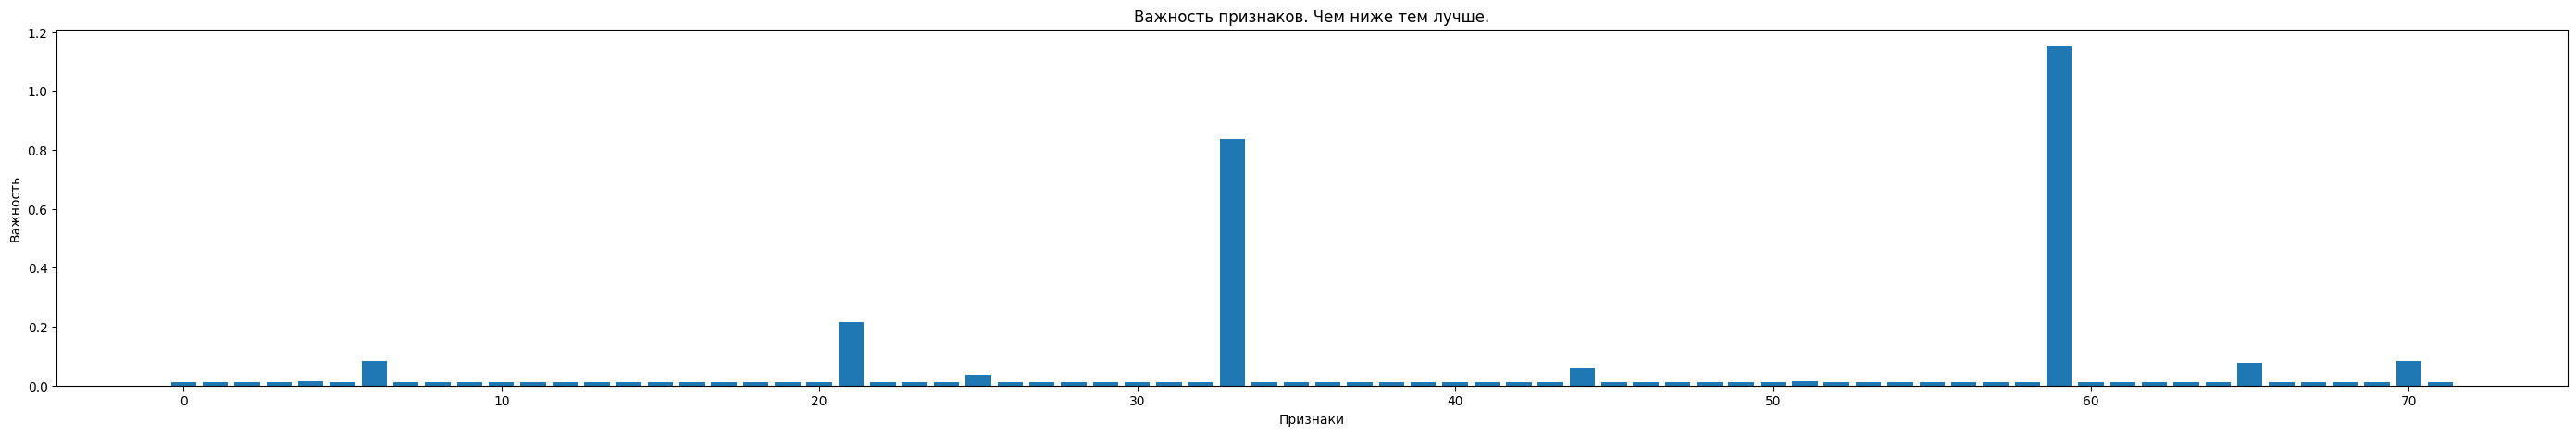

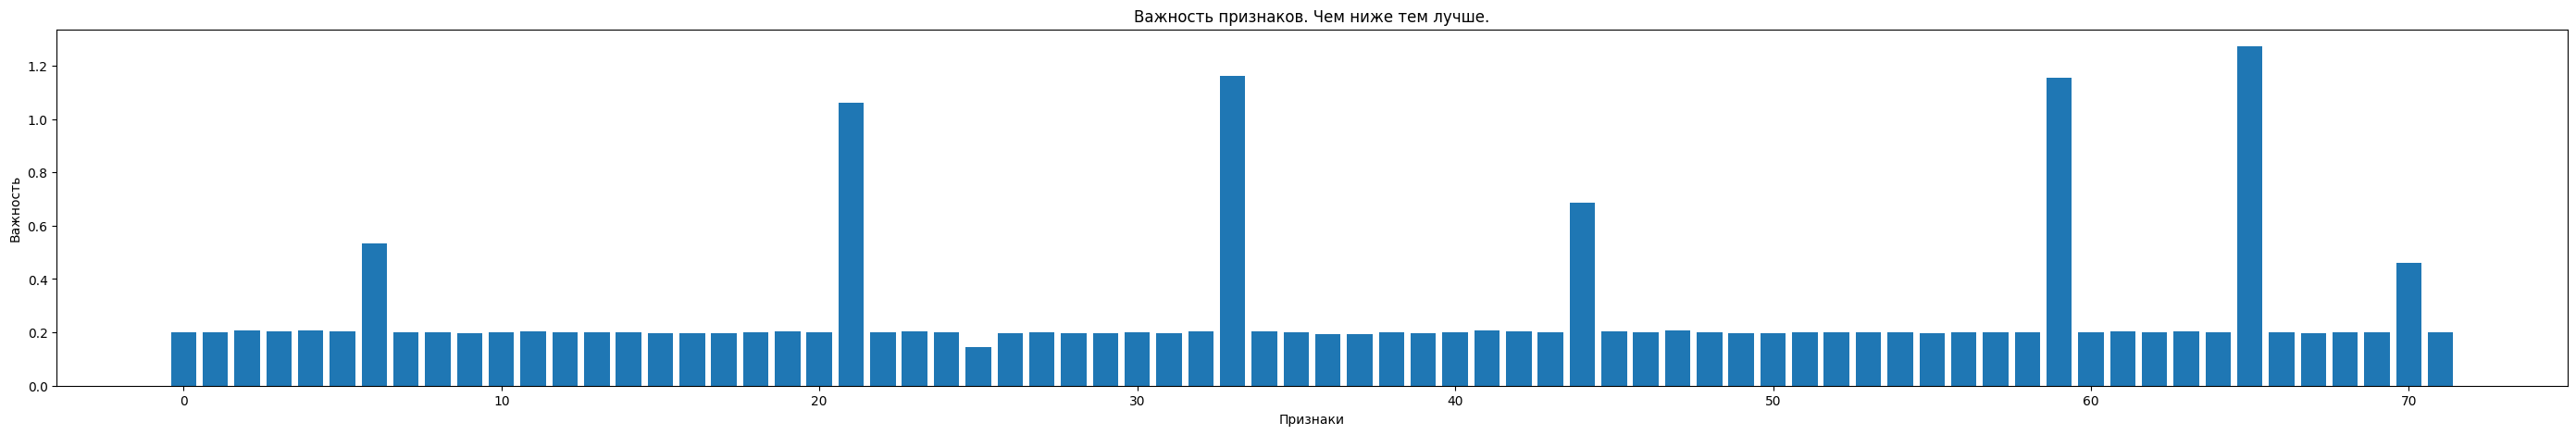

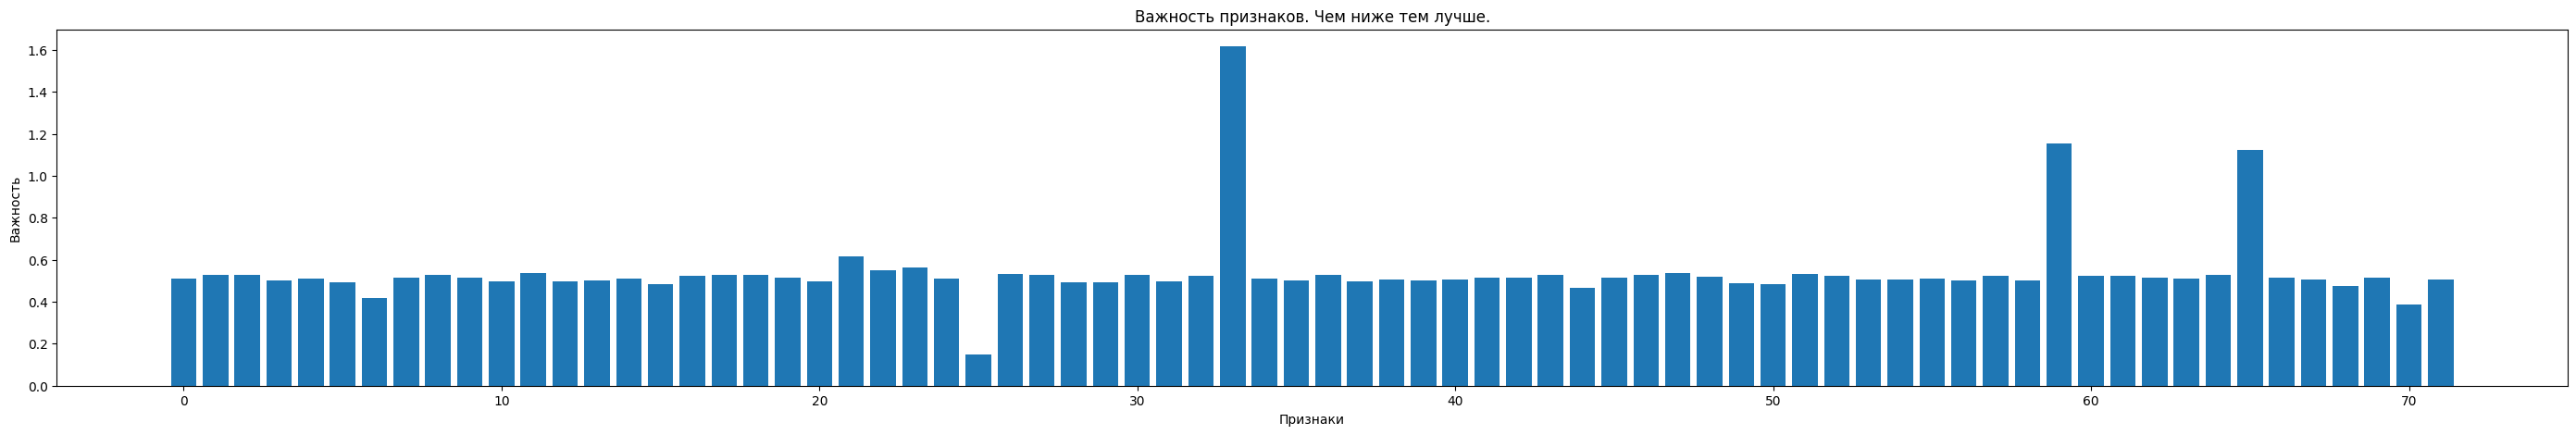

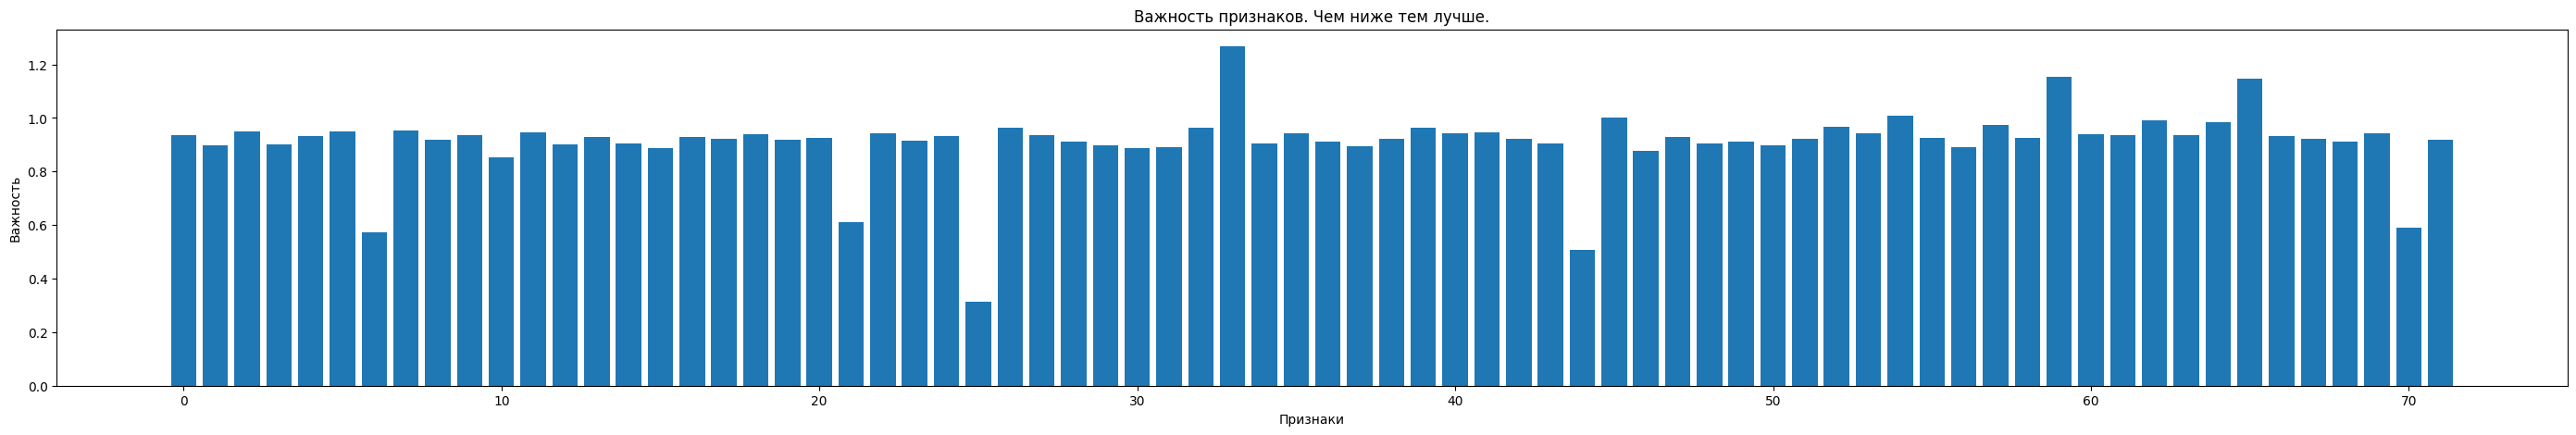

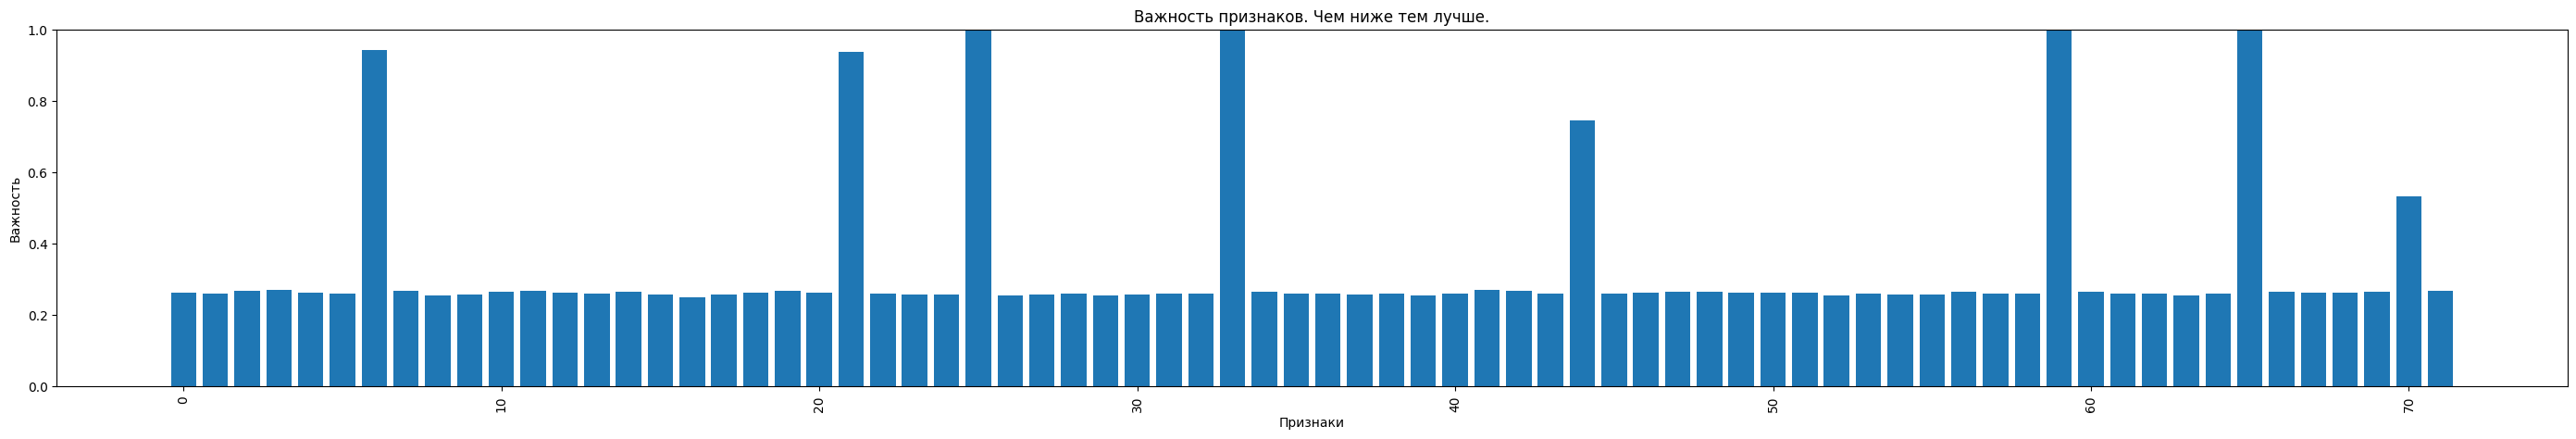

In [13]:
fig, ax = plt.subplots(figsize=(35, 5))
plt.bar(gr_0.index, gr_0)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков. Чем ниже тем лучше.')

fig, ax = plt.subplots(figsize=(35, 5))
plt.bar(gr_2.index, gr_2)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков. Чем ниже тем лучше.')
fig, ax = plt.subplots(figsize=(35, 5))
plt.bar(gr_3.index, gr_3)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков. Чем ниже тем лучше.')
fig, ax = plt.subplots(figsize=(35, 5))
plt.bar(gr_4.index, gr_4)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков. Чем ниже тем лучше.')
fig, ax = plt.subplots(figsize=(35, 5))
plt.bar(gr_5.index, gr_5)
plt.ylim(0,1)
plt.xticks(rotation=90)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важность признаков. Чем ниже тем лучше.');

**Проанализируем полученные графики:**

   - Первый график отражает наибольший объем данных, признаки ['6','21','25','33','44','59','65','70'] отрицательно влияют на схожесть товаров, то же самое наблюдаем на пятом графике. Эти признаки не должны учитываться при обучении и предсказании модели.
   - По второму графику - ненужные признаки ['6','21','33','44','59','65','70'].
   - В третьем графике видим лишь два важных признака - это ['25','70'].
   - По червёртому графику важными являются признаки ['25','44','6']. Признаки '21' и '70' также смотрятся неплохо, но всё же по ним уже различие больше 0,6.
   
Необходимо обучать 4 модели по данным комбинациям признаков и взять 5 уникальных прогнозов.

In [14]:
del train_analys, base_in_train, base_train_joint, k_means_df, difference

### Подготовка данных

In [15]:
base_index = {k: v for k, v in enumerate(base['Id'].to_list())}

Выделим четыре комплекта данных в соответсвии с проведенным анализом признаков:

In [16]:
base_1 = base.drop(['6','21','25','33','44','59','65','70'], axis=1)
train_1 = train.drop(['6','21','25','33','44','59','65','70'], axis=1)
train_featues_1 = train_1.drop(['Id','Target'], axis=1)
base_featues_1 = base_1.iloc[:,1:]

In [17]:
base_2 = base.drop(['6','21','33','44','59','65','70'], axis=1)
train_2 = train.drop(['6','21','33','44','59','65','70'], axis=1)
train_featues_2 = train_2.drop(['Id','Target'], axis=1)
base_featues_2 = base_2.iloc[:,1:]

In [18]:
base_3 = base[['25','44','6']]
train_featues_3 = train[['25','44','6']]
base_featues_3 = base_3

In [19]:
base_4 = base[['25','70']]
train_featues_4 = train[['25','70']]
base_featues_4 = base_4

In [20]:
train_id = train['Id']
train_target = train['Target']

Масштабируем каждый набор данных:

In [21]:
scaler_1 = StandardScaler()
scaler_1.fit(base_featues_1)
base_featues_1 = pd.DataFrame(scaler_1.transform(base_featues_1), columns=base_featues_1.columns)
train_featues_1 = pd.DataFrame(scaler_1.transform(train_featues_1), columns=train_featues_1.columns)

In [22]:
scaler_2 = StandardScaler()
scaler_2.fit(base_featues_2)
base_featues_2 = pd.DataFrame(scaler_2.transform(base_featues_2), columns=base_featues_2.columns)
train_featues_2 = pd.DataFrame(scaler_2.transform(train_featues_2), columns=train_featues_2.columns)

In [23]:
scaler_3 = StandardScaler()
scaler_3.fit(base_featues_3)
base_featues_3 = pd.DataFrame(scaler_3.transform(base_featues_3), columns=base_featues_3.columns)
train_featues_3 = pd.DataFrame(scaler_3.transform(train_featues_3), columns=train_featues_3.columns)

In [24]:
scaler_4 = StandardScaler()
scaler_4.fit(base_featues_4)
base_featues_4 = pd.DataFrame(scaler_4.transform(base_featues_4), columns=base_featues_4.columns)
train_featues_4 = pd.DataFrame(scaler_4.transform(train_featues_4), columns=train_featues_4.columns)

### KNeighborsClassifier

Инициализируем и обучим модели ближайших соседей для каждого набора:

In [25]:
start_time = time.time()

knnr_model_1 = KNeighborsClassifier(n_neighbors=100, algorithm='brute')
knnr_model_1.fit(base_featues_1, base['Id'])

knnr_model_2 = KNeighborsClassifier(n_neighbors=100, algorithm='brute')
knnr_model_2.fit(base_featues_2, base['Id'])

knnr_model_3 = KNeighborsClassifier(n_neighbors=100, algorithm='brute')
knnr_model_3.fit(base_featues_3, base['Id'])

knnr_model_4 = KNeighborsClassifier(n_neighbors=100, algorithm='brute')
knnr_model_4.fit(base_featues_4, base['Id'])

knn_fit_time = time.time() - start_time

print('Время обучения:', round(knn_fit_time, 2),'c')

Время обучения: 13.94 c


Найдем соседние точки для train:

In [26]:
start_time = time.time()
pred_1 = knnr_model_1.kneighbors(train_featues_1.values, return_distance=False, n_neighbors = 2)
pred_2 = knnr_model_2.kneighbors(train_featues_2.values, return_distance=False, n_neighbors = 3)
pred_3 = knnr_model_3.kneighbors(train_featues_3.values, return_distance=False, n_neighbors = 4)
pred_4 = knnr_model_4.kneighbors(train_featues_4.values, return_distance=False, n_neighbors = 5)
knn_pred_time = time.time() - start_time
print('Время прогноза:', round(knn_pred_time, 2),'c')

C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Время прогноза: 690.25 c


Нам необходимо 5 прогнозов, однако некоторые прогнозы в разных моделях могут совпадать, поэтому для основной модели взяли 2 предсказания, а для остальных на 1 больше чем в предыдущем, чтобы потом можно было уверенно выбрать 5 уникальных. То есть в последующих будем брать первый уникальный прогноз.

Объединим прогнозы моделей, возьмем последовательно по одному уникальному предсказанию с каждого после первого (всего 5 прогнозов):

In [27]:
pred =[]
for i in range(len(pred_1)):
    list_pred =list(pred_1[i])
    x = [x for x in list(pred_2[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(pred_3[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(pred_4[i]) if x not in list_pred][0]
    list_pred.append(x)
    pred.append(list_pred)

Посмотрим первые 10 прогнозов, убедимся в их уникальности:

In [28]:
pred[0:10]

[[336969, 1113711, 1818641, 1519986, 598613],
 [15185, 519311, 737853, 2621203, 2207064],
 [1162532, 173120, 1784963, 246712, 2],
 [1179186, 980736, 556881, 2367257, 2],
 [631912, 726816, 2910931, 231542, 2],
 [1742186, 2214365, 546386, 1375875, 1267165],
 [5251, 3917, 1410978, 764838, 2277026],
 [22314, 8102, 60567, 1803275, 2],
 [24016, 345943, 104092, 11321, 267067],
 [677269, 766968, 1737045, 2876179, 2]]

Посчитаем метрику accuracy@5 для полученных предсказаний моделей KNeighborsClassifier:

In [29]:
acc = 0
for target, el in zip(train_target.values.tolist(), pred):
    acc += int(target in [base_index[r] for r in el])
acc_knn = 100 * acc / len(pred)
print('Метрика accuracy@5 для модели KNeighborsClassifier:', acc_knn)
print('Общее время на обучение и предсказание KNeighborsClassifier:', round((knn_pred_time+knn_fit_time)/60, 2),'мин')

Метрика accuracy@5 для модели KNeighborsClassifier: 83.95
Общее время на обучение и предсказание KNeighborsClassifier: 11.74 мин


### FAISS

Обучим индексы FAISS для каждого набора данных:

In [30]:
start_time = time.time()
n_cells = 100

dims = base_featues_1.shape[1]
quantizer_1 = faiss.IndexFlatL2(dims)
idx_l2_1 = faiss.IndexIVFFlat(quantizer_1, dims, n_cells, faiss.METRIC_L2)
idx_l2_1.train(np.ascontiguousarray(base_featues_1.values).astype('float32'))
idx_l2_1.add(np.ascontiguousarray(base_featues_1.values).astype('float32'))


dims = base_featues_2.shape[1]
quantizer_2 = faiss.IndexFlatL2(dims)
idx_l2_2 = faiss.IndexIVFFlat(quantizer_2, dims, n_cells, faiss.METRIC_L2)
idx_l2_2.train(np.ascontiguousarray(base_featues_2.values).astype('float32'))
idx_l2_2.add(np.ascontiguousarray(base_featues_2.values).astype('float32'))


dims = base_featues_3.shape[1]
quantizer_3 = faiss.IndexFlatL2(dims)
idx_l2_3 = faiss.IndexIVFFlat(quantizer_3, dims, n_cells, faiss.METRIC_L2)
idx_l2_3.train(np.ascontiguousarray(base_featues_3.values).astype('float32'))
idx_l2_3.add(np.ascontiguousarray(base_featues_3.values).astype('float32'))

dims = base_featues_4.shape[1]
quantizer_4 = faiss.IndexFlatL2(dims)
idx_l2_4 = faiss.IndexIVFFlat(quantizer_4, dims, n_cells, faiss.METRIC_L2)
idx_l2_4.train(np.ascontiguousarray(base_featues_4.values).astype('float32'))
idx_l2_4.add(np.ascontiguousarray(base_featues_4.values).astype('float32'))


faiss_fit_time = time.time() - start_time

print('Время на обучение FAISS:', round(faiss_fit_time, 2),'c')


Время на обучение FAISS: 37.66 c


Выполним поиска индексов наиболее похожих векторов для каждого вектора из train:

In [31]:
start_time = time.time()

r_1, idx_1 = idx_l2_1.search(np.ascontiguousarray(train_featues_1.values).astype('float32'), 2)
r_2, idx_2 = idx_l2_2.search(np.ascontiguousarray(train_featues_2.values).astype('float32'), 3)
r_3, idx_3 = idx_l2_3.search(np.ascontiguousarray(train_featues_3.values).astype('float32'), 4)
r_4, idx_4 = idx_l2_4.search(np.ascontiguousarray(train_featues_4.values).astype('float32'), 5)

faiss_search_time = time.time() - start_time
print('Время поиска FAISS:', round(faiss_search_time, 2),'c')

Время поиска FAISS: 48.96 c


Объединим прогнозы моделей, возьмем последовательно по одному уникальному предсказанию с каждого после первого (всего 5 прогнозов):

In [32]:
idx =[]
for i in range(len(idx_1)):
    list_pred =list(idx_1[i])
    x = [x for x in list(idx_2[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(idx_3[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(idx_4[i]) if x not in list_pred][0]
    list_pred.append(x)
    idx.append(list_pred)

Посчитаем метрику accuracy@5 для полученных предсказаний моделей FAISS:

In [33]:
acc = 0
for target, el in zip(train_target.values.tolist(), idx):
    acc += int(target in [base_index[r] for r in el])
acc_faiss = 100 * acc / len(pred)
print('Метрика accuracy@5 для FAISS:', acc_faiss)
print('Общее время на обучение и предсказание FAISS:', round((faiss_fit_time+faiss_search_time)/60, 2),'мин')

Метрика accuracy@5 для FAISS: 80.809
Общее время на обучение и предсказание FAISS: 1.44 мин


#### Вывод:

In [34]:
print('Метрика accuracy@5 для модели KNeighborsClassifier:', acc_knn)
print('Общее время на обучение и предсказание KNeighborsClassifier:', round((knn_pred_time+knn_fit_time)/60, 2),'мин')
print()
print('Метрика accuracy@5 для FAISS:', acc_faiss)
print('Общее время на обучение и предсказание FAISS:', round((faiss_fit_time+faiss_search_time)/60, 2),'мин')




Метрика accuracy@5 для модели KNeighborsClassifier: 83.95
Общее время на обучение и предсказание KNeighborsClassifier: 11.74 мин

Метрика accuracy@5 для FAISS: 80.809
Общее время на обучение и предсказание FAISS: 1.44 мин


### Проверка работы моделей на валидационных данных

Подготовим валидационные данные:

In [35]:
valid_featues_1 = validation.drop(['Id','6','21','25','33','44','59','65','70'], axis=1)
valid_featues_2 = validation.drop(['Id','6','21','33','44','59','65','70'], axis=1)
valid_featues_3 = validation[['25','44','6']]
valid_featues_4 = validation[['25','70']]
valid_target = validation_answer['Expected']

In [36]:
valid_featues_1 = pd.DataFrame(scaler_1.transform(valid_featues_1), columns=valid_featues_1.columns)
valid_featues_2 = pd.DataFrame(scaler_2.transform(valid_featues_2), columns=valid_featues_2.columns)
valid_featues_3 = pd.DataFrame(scaler_3.transform(valid_featues_3), columns=valid_featues_3.columns)
valid_featues_4 = pd.DataFrame(scaler_4.transform(valid_featues_4), columns=valid_featues_4.columns)

#### KNeighborsClassifier:

In [37]:
start_time = time.time()
pred_1 = knnr_model_1.kneighbors(valid_featues_1.values, return_distance=False, n_neighbors = 2)
pred_2 = knnr_model_2.kneighbors(valid_featues_2.values, return_distance=False, n_neighbors = 3)
pred_3 = knnr_model_3.kneighbors(valid_featues_3.values, return_distance=False, n_neighbors = 4)
pred_4 = knnr_model_4.kneighbors(valid_featues_4.values, return_distance=False, n_neighbors = 5)
knn_val_pred_time = time.time() - start_time
print('Время прогноза:', round(knn_val_pred_time, 2),'c')

C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Rushan\anaconda3\envs\ds_practicum_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Время прогноза: 689.0 c


In [38]:
pred =[]
for i in range(len(pred_1)):
    list_pred =list(pred_1[i])
    x = [x for x in list(pred_2[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(pred_3[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(pred_4[i]) if x not in list_pred][0]
    list_pred.append(x)
    pred.append(list_pred)

In [39]:
acc = 0
for target, el in zip(valid_target.values.tolist(), pred):
    acc += int(target in [base_index[r] for r in el])
acc_faiss = 100 * acc / len(pred)
print('Метрика accuracy@5 на валидационных данных:', 100 * acc / len(pred))
print('Время предсказание KNeighborsClassifier:', round(knn_val_pred_time/60, 2),'мин')

Метрика accuracy@5 на валидационных данных: 83.758
Время предсказание KNeighborsClassifier: 11.48 мин


#### FAISS:

In [40]:
start_time = time.time()

r_1, idx_1 = idx_l2_1.search(np.ascontiguousarray(valid_featues_1.values).astype('float32'), 2)
r_2, idx_2 = idx_l2_2.search(np.ascontiguousarray(valid_featues_2.values).astype('float32'), 3)
r_3, idx_3 = idx_l2_3.search(np.ascontiguousarray(valid_featues_3.values).astype('float32'), 4)
r_4, idx_4 = idx_l2_4.search(np.ascontiguousarray(valid_featues_4.values).astype('float32'), 5)

faiss_valid_search_time = time.time() - start_time
print('Время поиска FAISS:', round(faiss_valid_search_time/60, 2),'мин')

Время поиска FAISS: 0.81 мин


In [41]:
idx =[]
for i in range(len(idx_1)):
    list_pred =list(idx_1[i])
    x = [x for x in list(idx_2[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(idx_3[i]) if x not in list_pred][0]
    list_pred.append(x)
    x = [x for x in list(idx_4[i]) if x not in list_pred][0]
    list_pred.append(x)
    idx.append(list_pred)

In [42]:
acc = 0
for target, el in zip(valid_target.values.tolist(), idx):
    acc += int(target in [base_index[r] for r in el])
acc_valid_faiss = 100 * acc / len(pred)
print('Метрика accuracy@5 для FAISS:', acc_valid_faiss)
print('Общее время на обучение и предсказание FAISS:', round(faiss_valid_search_time/60, 2),'мин')

Метрика accuracy@5 для FAISS: 80.495
Общее время на обучение и предсказание FAISS: 0.81 мин


### Вывод.

   - Был выполнен анализ признаков. Выделены необходиме признаки для различных групп товаров.
   - Подготовлены данные: создали 4 группы товаров с различными параметрами для выявления соответсвия, масштабировали признаки.
   - Обучены модели KNeighborsClassifier для каждой групп данных и найдены 5 соответсвующих из base. На тренировочных данных получили метрику accuracy@5 - 83.95, с временем обучения и прогноза около 12 минут.
   - Обучены модели FAISS для каждой групп данных и найдены 5 соответсвующих из base. На тренировочных данных получили метрику accuracy@5 - 80.8, с временем обучения и прогноза около 1.5 минуты.
   - Также проверили работу на валидационных данных - результаты аналогичные.
    
Если время обучения и прогнозирования не является критичным, то необходимо использовать модель ближайших соседей.

Если же время является критичным параметров, то необходимо использовать модель основанную на библиотеке FAISS. Он работает намного быстрее, метрика не намного ниже и составляет порядка 80.5%.